# NLP Web App for Syllabi Data Exploration 

## This dashboard is for allowing interactive exploratory data analysis 

In [1]:
# If an error occurs in this cell, it is likely because you need to pip install a package(s) 
import pandas as pd
import os
import gensim
from gensim.utils import simple_preprocess
import nltk
#nltk.download('wordnet')
#from nltk.corpus import stopwords
#from nltk.stem.lancaster import LancasterStemmer
import gensim.corpora as corpora
from pprint import pprint 
import ast
from glob import glob
from collections import Counter
import re
import matplotlib.pyplot as plt
import csv
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual 
from wordcloud import WordCloud 
import seaborn as sns

In [2]:
# Set directory and get data - may need to modify this to wherever you have the data stored 
#os.chdir("/Users/jordan/Desktop/NLP_Syllabi_Project_copy/data_and_output")
data = pd.read_csv("cleaned_data_new.csv", lineterminator='\n')
data.drop(data.columns[[0, 1, 2]], axis = 1, inplace = True) #drop meaningless indice columns 
data['index'] = data.index
#print(data.head())
#len(data.index) #4889 documents 

In [3]:
# Create new data, just text and index 
data = data[['Corpus', 'index']] 
#print(data.head())

In [4]:
# Further preprocessing (removes stop words and also words 3 characters or less) 
# Note: There was additional preprocessing done in previous steps (earlier scripts located in scripts folder)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >3:
            result.append(token)
    return result

#doc_sample = data[data['index'] == 1].values[0][0]
#print('original document: ')
#words = []
#for word in doc_sample.split(' '):
#    words.append(word)
#print(words)
#print('\n\n tokenized and document: ')
#print(preprocess(doc_sample))

processed_text = data['Corpus'].astype('str').map(preprocess)
#print(processed_text[:10])

In [5]:
# Create word lists for exploratory data analysis 

# Get all data row lists into one list 
all_words_list=[]
for index, row in processed_text.items():
    contri = row
    all_words_list.extend(contri)
    
# Get all data row lists with unique elements into one list (to see individual words by documents - removes duplicates within a single document)
all_docs_list=[]
for index, row in processed_text.items():
    contri = list(set(row))
    all_docs_list.extend(contri)

## Word Frequency Table (Output Truncated for Word Selection Greater Than 50k) 

In [6]:
# Explore word frequencies - this shows the proportion of times a word appears across all 4889 syllabi documents 
pd.set_option('display.max_rows', 50000) # change this as needed
@interact 
def word_interacter(num=(1,151364,10)):
    y = Counter(all_docs_list)
    freq = y.most_common(num)
    df = pd.DataFrame(freq, columns=["Word", "Proportion"])
    df['Proportion'] = df['Proportion'].div(4889).round(2) 
    #df['Percentage'] = (df['Percentage']*100).astype('str').str.strip(".0") + "%"
    return df
# To save
#df.to_csv("word_freq.csv")

interactive(children=(IntSlider(value=75681, description='num', max=151364, min=1, step=10), Output()), _dom_c…

## Word Cloud of Most Common Words

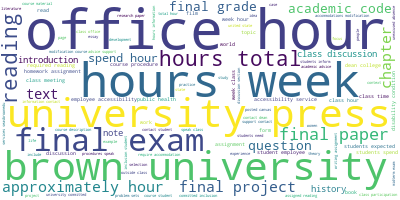

In [7]:
# Create word cloud to see a visual of most common words 
# Didn't make this interactive because it takes too long to load and refresh 
long_string = ' '.join(all_words_list)
wcloud = WordCloud(background_color="white", max_words = 5000, 
                         contour_width = 3, contour_color='steelblue')
wcloud.generate(long_string)
wcloud.to_image()

## Histogram of Word Frequencies 

In [8]:
# Histogram of words (gives up to 1000 most common words)
@interact
def histo_fun(Num_words=(1, 1000, 1), Zoom_image=(4, 500, 1)):
    sns.set(rc={"figure.figsize": (8, Zoom_image)})
    counter=Counter(all_words_list)
    most=counter.most_common(Num_words)
    x, y= [], []
    for word,count in most[:]:
        x.append(word)
        y.append(count)
    return sns.barplot(x=y,y=x)

interactive(children=(IntSlider(value=500, description='Num_words', max=1000, min=1), IntSlider(value=252, des…